<a href="https://colab.research.google.com/github/chaimajaballah0/tweets_sentiment_analysis/blob/main/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import pickle
# Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
data = pd.read_pickle('data.pkl')

In [ ]:
data.head(5)

,target,ids,date,flag,user,text
0,NEGATIVE,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,NEGATIVE,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,NEGATIVE,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,NEGATIVE,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,NEGATIVE,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
print('lenght of data is', len(data))

lenght of data is 1600000


In [ ]:
#Shape of data
data.shape

(1600000, 6)

In [ ]:
#Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  object
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(1), object(5)
memory usage: 73.2+ MB


In [ ]:
#Data types of all coloumns
data.dtypes

target    object
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

In [ ]:
#Checking Null values
np.sum(data.isnull().any(axis=1))

0

Text(0.5, 1.0, 'Dataset labels distribuition')

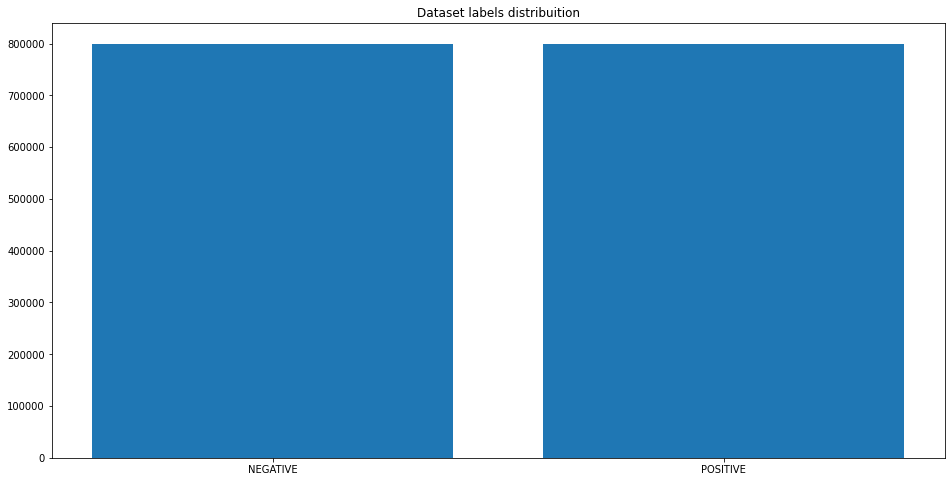

In [ ]:
#visualize the labels distribution in the dataset
target_cnt = Counter(data.target)

plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")

In [ ]:
import random
random_idx_list = [random.randint(1,len(data.text)) for i in range(10)] # creates random indexes to choose from dataframe
data.loc[random_idx_list,:].head(10) # Returns the rows with the index and display it

,target,ids,date,flag,user,text
1248763,POSITIVE,1995896246,Mon Jun 01 14:12:59 PDT 2009,NO_QUERY,FAiiiNT,FCKYEAA I went a whole school day without twit...
556257,NEGATIVE,2204241421,Wed Jun 17 01:41:51 PDT 2009,NO_QUERY,aquadove,I am begging for sleep right about now Extrem...
1547836,POSITIVE,2182862612,Mon Jun 15 13:44:03 PDT 2009,NO_QUERY,iellie,Oh Hai #squarespace can has iphone gift card? ...
551486,NEGATIVE,2203179188,Tue Jun 16 23:11:12 PDT 2009,NO_QUERY,augusto_young,@radioactivcheez sureee!i follow them since t...
765465,NEGATIVE,2299468638,Tue Jun 23 12:57:29 PDT 2009,NO_QUERY,tvproduceradam,@protegeimages yep the taste of Chicago starts...
131869,NEGATIVE,1835624468,Mon May 18 06:24:26 PDT 2009,NO_QUERY,feedyourpig,@kyleelane any thoughts on how my sister can g...
697154,NEGATIVE,2253735063,Sat Jun 20 08:39:32 PDT 2009,NO_QUERY,davigirl1,I sure wish my husband didn't fish all the tim...
7186,NEGATIVE,1469720905,Tue Apr 07 07:13:22 PDT 2009,NO_QUERY,stewils,Looking forward to the dentists
1585052,POSITIVE,2190633136,Tue Jun 16 03:17:21 PDT 2009,NO_QUERY,bricyan357,"I'm going home tomorrow!!! I heart Melbourne, ..."
381801,NEGATIVE,2052855433,Sat Jun 06 02:17:19 PDT 2009,NO_QUERY,midnightnina,"Went for a walk at the mall. Rained so hard, t..."


In [ ]:
data_cleaned = pd.read_pickle('data_cleaned.pkl')

In [ ]:
#visualize the positive bag of words
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data_cleaned[data_cleaned.target == 'POSITIVE'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
#visualize the negative bag of words
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(data_cleaned[data_cleaned.target == 'NEGATIVE'].text))
plt.imshow(wc , interpolation = 'bilinear')